# UCI EMG Dataset Classification Project

In this project, [I will work on UCI EMG data for gestures data set.](https://archive.ics.uci.edu/ml/datasets/EMG+data+for+gestures). I will start with data processing then apply cross-validation for classifaction purposes.

## EDA

First, we will import required libraries for pre-processing. Please note the class variables in the dataset 


- 1)Time - time in ms;
- 2-9) Channel - eightEMG channels of MYO Thalmic bracelet;
- 10) Class  –thelabel of gestures: 
  - 0 - unmarked data,
  - 1 - hand at rest, 
  - 2 - hand clenched in a fist, 
  - 3 - wrist flexion,
  - 4 – wrist extension,
  - 5 – radial deviations,
  - 6 - ulnar deviations,
  - 7 - extended palm (the gesture was not performed by all subjects).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline 

Our dataset in the code directory with "Data" filename. We will import 72 txt files and merged those files in a single dataframe.

In [2]:
#importing data txt files
files = glob.glob('Data/*.txt')
#Let's check the number of txt files
len(files)

72

In next two code snippet, first we will concat all files in a single dataframe called **df** . Then we will describe the dataset.

In [3]:
df = pd.concat([pd.read_csv(f, sep = "\t") for f in files], ignore_index = True)

In [4]:
len(df)

4237908

In [5]:
df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,-0.00003,-0.00001,0.00004,-0.00003,0.00000,-0.00001,-0.00003,-0.00002,0.0
1,5,-0.00003,-0.00001,0.00004,-0.00003,0.00000,-0.00001,-0.00003,-0.00002,0.0
2,6,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0.0
3,7,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0.0
4,8,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0.0


In [6]:
df.describe()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237908e+06,4.237907e+06
mean,3.113689e+04,-7.911481e-06,-9.416077e-06,-9.548735e-06,-9.637838e-06,-1.599724e-05,-1.085528e-05,-9.364637e-06,-9.696860e-06,1.265671e+00
std,1.868079e+04,1.631110e-04,1.192228e-04,1.241846e-04,2.257728e-04,2.724188e-04,2.151405e-04,1.527311e-04,1.720933e-04,1.989693e+00
min,0.000000e+00,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,0.000000e+00
25%,1.529000e+04,-3.000000e-05,-4.000000e-05,-4.000000e-05,-6.000000e-05,-8.000000e-05,-6.000000e-05,-4.000000e-05,-3.000000e-05,0.000000e+00
50%,3.054600e+04,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,0.000000e+00
75%,4.580400e+04,2.000000e-05,2.000000e-05,3.000000e-05,4.000000e-05,5.000000e-05,3.000000e-05,2.000000e-05,1.000000e-05,2.000000e+00
max,9.714400e+04,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,7.000000e+00


Null values check:

In [7]:
df.isna().sum()

time        0
channel1    0
channel2    0
channel3    0
channel4    0
channel5    0
channel6    0
channel7    0
channel8    0
class       1
dtype: int64

let's remove the null row from the dataset and check types

In [8]:
df.dropna(inplace= True)

In [9]:
df.dtypes

time          int64
channel1    float64
channel2    float64
channel3    float64
channel4    float64
channel5    float64
channel6    float64
channel7    float64
channel8    float64
class       float64
dtype: object

In [10]:
df.size

42379070

Correlation coefficients quantify the association between variables or features of a dataset.

<ipython-input-12-883e47a13233>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


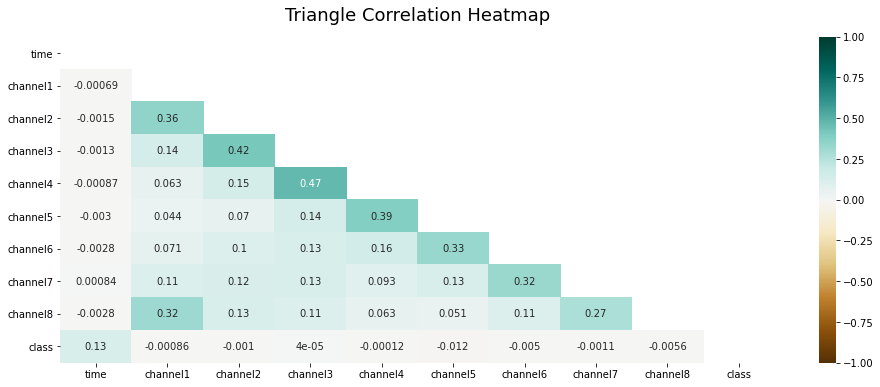

In [12]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Let's see the value counts of each class variable. Class 7 has low input according to other classes, it is wise to remove class 7 from the dataset.

In [13]:
print("Value Count :\n", df["class"].value_counts())

Value Count :
 0.0    2725157
6.0     253009
5.0     251733
4.0     251570
1.0     250055
3.0     249494
2.0     243193
7.0      13696
Name: class, dtype: int64


In [14]:
index_numbers_2=df[df["class"]==7].index
df.drop(index_numbers_2,inplace=True)

Also, time is unnecessary for classification purpose in our dataset.

In [15]:
df.drop('time',axis=1, inplace=True)

In [16]:
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,-0.00003,-0.00001,0.00004,-0.00003,0.00000,-0.00001,-0.00003,-0.00002,0.0
1,-0.00003,-0.00001,0.00004,-0.00003,0.00000,-0.00001,-0.00003,-0.00002,0.0
2,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0.0
3,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0.0
4,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0.0


Also we can change the class labels to integer values.

In [17]:
df = df.astype({"class": int})

In [18]:
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,-0.00003,-0.00001,0.00004,-0.00003,0.00000,-0.00001,-0.00003,-0.00002,0
1,-0.00003,-0.00001,0.00004,-0.00003,0.00000,-0.00001,-0.00003,-0.00002,0
2,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0
3,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0
4,-0.00002,-0.00003,-0.00021,-0.00005,-0.00001,0.00000,-0.00002,0.00001,0


In [29]:
df['class'].unique()

array([0, 1, 2, 3, 4, 5, 6])

# KNN Classifier

First, let's import the required libraries.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Then, we will divide the data into features and class variables.

In [20]:
features=df.drop(columns=["class"])
labels=df["class"]

Let's define train and test data and try to find optimum neighbors and distance measure.

In [22]:
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)

First, let's start with manhattan.

For simplicity, I will start with Minkowski distance with 10 neighbors.

In [27]:
knn=KNeighborsClassifier(metric='minkowski',algorithm= 'auto',n_neighbors=10,p=2,weights='distance',leaf_size=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("F1 Score", f1_score(y_test, y_pred, average="macro"))
print("Precision",precision_score(y_test, y_pred, average="macro"))
print("Recall Score", recall_score(y_test, y_pred, average="macro"))
print("Confusion Matrix",confusion_matrix(y_test, y_pred))

Accuracy 0.9773172756426443
F1 Score 0.9670234402896022
Precision 0.9687157511314377
Recall Score 0.9653499986935624
Confusion Matrix [[806041   3521   1303   1607   1779   1658   1760]
 [  4478  70816      7     21     10     13     10]
 [  1820     14  70432    228    141    140    226]
 [  1793     22    167  72428     50    113    306]
 [  1868      8     85     39  73026    255    145]
 [  1883     39    130    121    368  72651     75]
 [  1795     11    186    293    168     89  73125]]


Now, we can visualize the confusion matrix of KNN Classifier

In [31]:
gestures = ["Unmarked", "Hand At Rest", "Hand Clenched In a Fist", "Wrist Flexion", "Wrist Extension","Radial Deviations", "Ulnar Deviations"]

Text(0.5, 1.0, 'Confusion Matrix (K)')

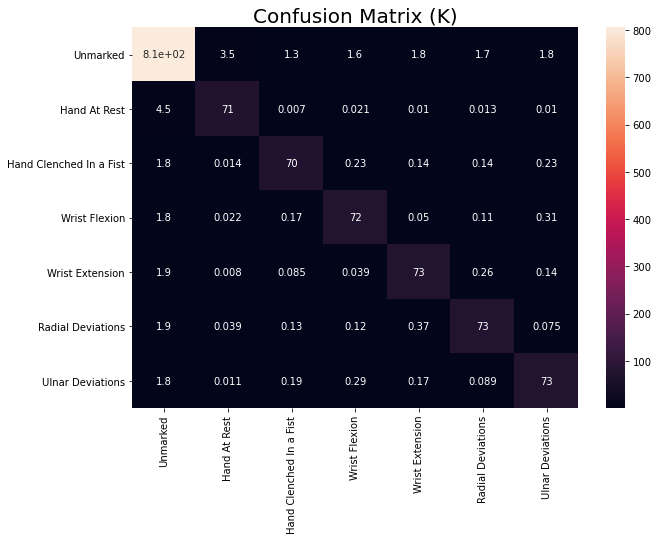

In [39]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred)/1000, index = [i for i in gestures],
                  columns = [i for i in gestures])
plt.figure(figsize = (10,7))
ax = plt.axes()
sns.heatmap(df_cm, ax = ax ,annot=True)
plt.title('Confusion Matrix (K)', fontsize = 20)

In [46]:
target_names = gestures
creport = classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
creport = pd.DataFrame(creport).transpose()
creport

,precision,recall,f1-score,support
Unmarked,0.983363,0.985779,0.984570,8.176690e+05
Hand At Rest,0.951432,0.939765,0.945562,7.535500e+04
Hand Clenched In a Fist,0.974028,0.964809,0.969397,7.300100e+04
Wrist Flexion,0.969105,0.967267,0.968185,7.487900e+04
Wrist Extension,0.966694,0.968181,0.967437,7.542600e+04
Radial Deviations,0.969727,0.965244,0.967480,7.526700e+04
Ulnar Deviations,0.966661,0.966405,0.966533,7.566700e+04
accuracy,0.977317,0.977317,0.977317,9.773173e-01
macro avg,0.968716,0.965350,0.967023,1.267264e+06
weighted avg,0.977285,0.977317,0.977296,1.267264e+06
